In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def disp(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

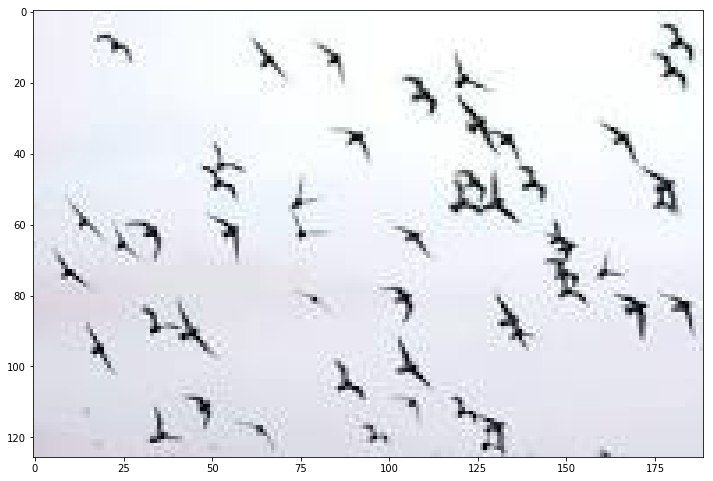

In [79]:
img = cv2.imread("brd.jpeg")
disp(img)
IMG=np.ones(img.shape[:2],dtype=np.uint8)*255

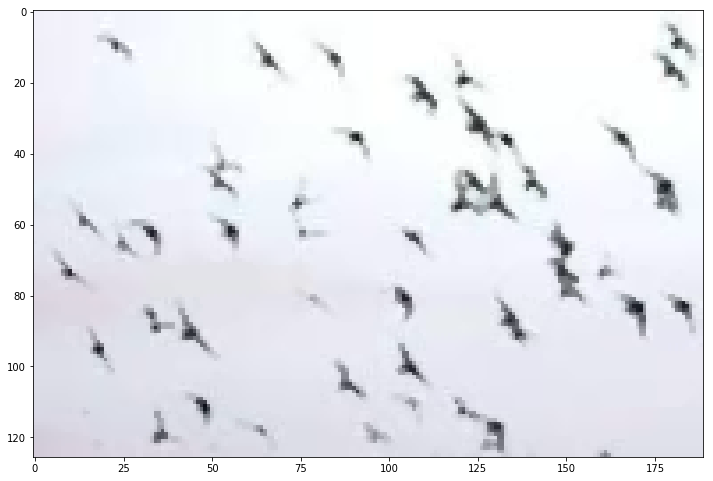

In [80]:
blrimg=cv2.medianBlur(img,3)
gryimgcp=blrimg.copy()
disp(blrimg)

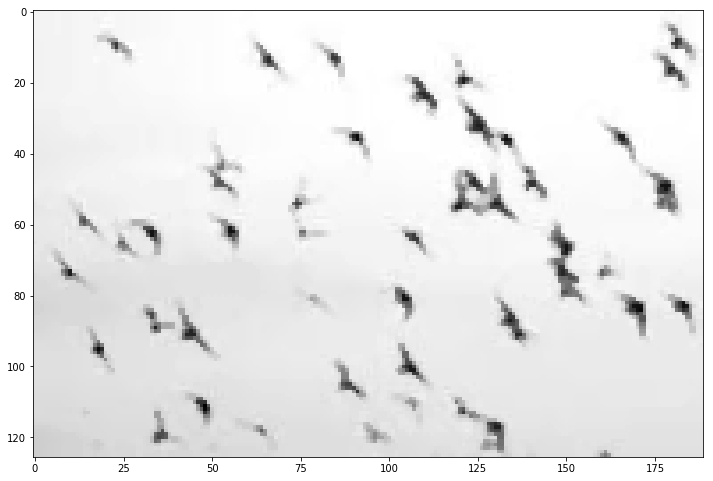

In [64]:
gryimg=cv2.cvtColor(blrimg,cv2.COLOR_BGR2GRAY )
disp(gryimg)

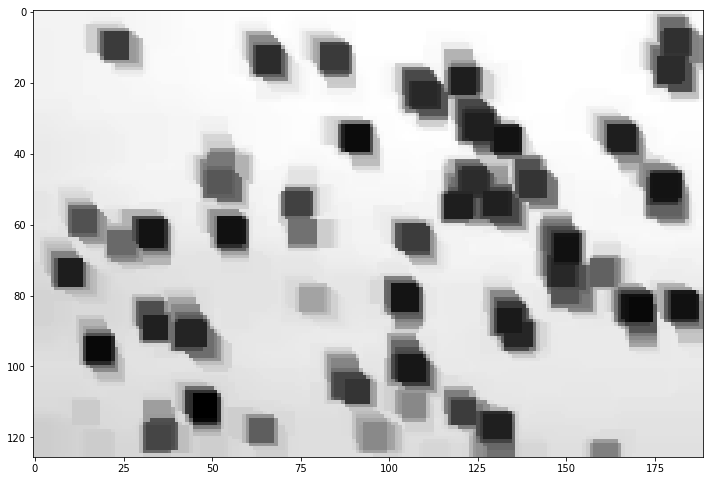

In [65]:
#erosion
kernel = np.ones((7,7), np.uint8) 
img_erosion = cv2.erode(gryimg, kernel, iterations=1) 
disp(img_erosion)

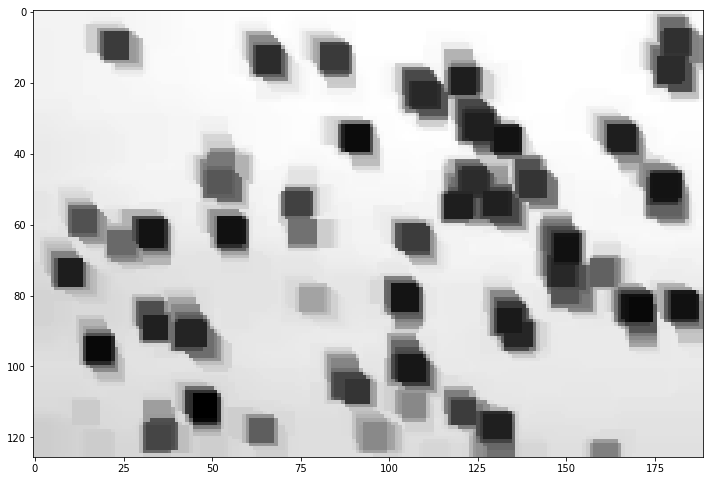

In [66]:
img_dilation = cv2.dilate(img_erosion, kernel, iterations=0) 
disp(img_dilation)

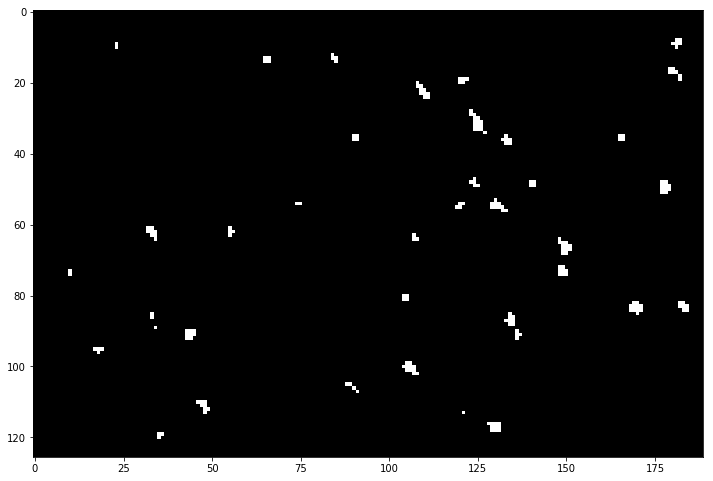

In [67]:
gr=np.array(img_erosion)
#v=np.mean(g)
v=90   #(np.min(gr)+np.max(gr))/2
#v=np.max(g)
#if img.shape==():
th,threshed = cv2.threshold(gryimg,v, 255,cv2.THRESH_BINARY_INV)#v2.THRESH_OTSU)
disp(threshed)

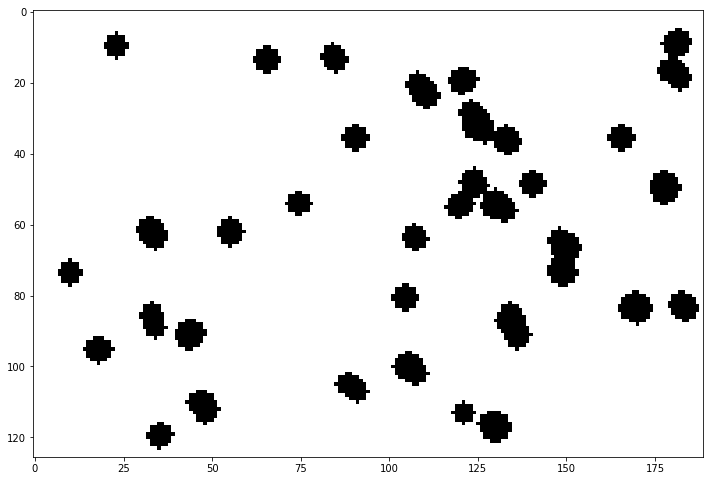

In [81]:
#contours
'''
imgray = cv2.cvtColor(dist_transform,cv2.COLOR_BGR2GRAY)
#imgray=dist_transform
ret,thresh = cv2.threshold(imgray,127,255,0)'''
contours, hierarchy = cv2.findContours(threshed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
'''cnt = contours[4]
cv2.drawContours(IMG, [cnt], 0, (0,255,0), 3)'''
cv2.drawContours(IMG, contours, -1, (0,255,0),5)
disp(IMG)

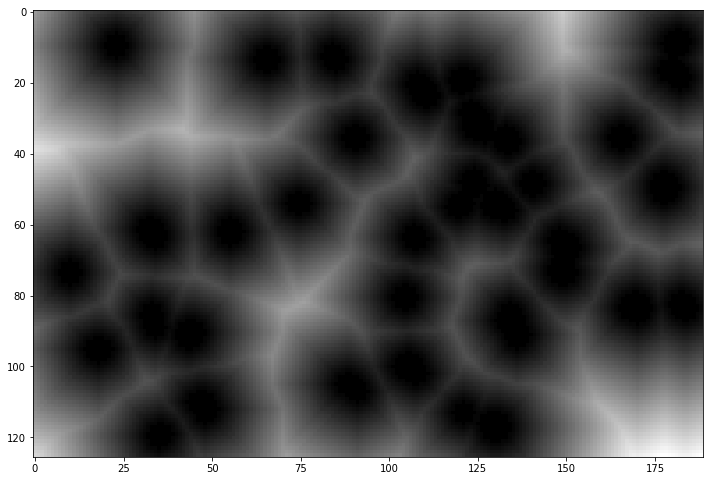

In [69]:
dist_transform=cv2.distanceTransform(IMG,cv2.DIST_L2,3)
disp(dist_transform)

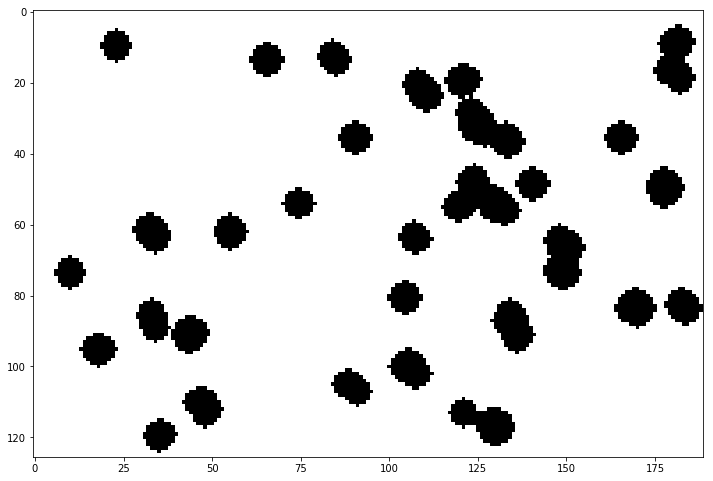

In [82]:
ret,sure_fg=cv2.threshold(dist_transform,0.0275*dist_transform.max(),255,0)
disp(sure_fg)

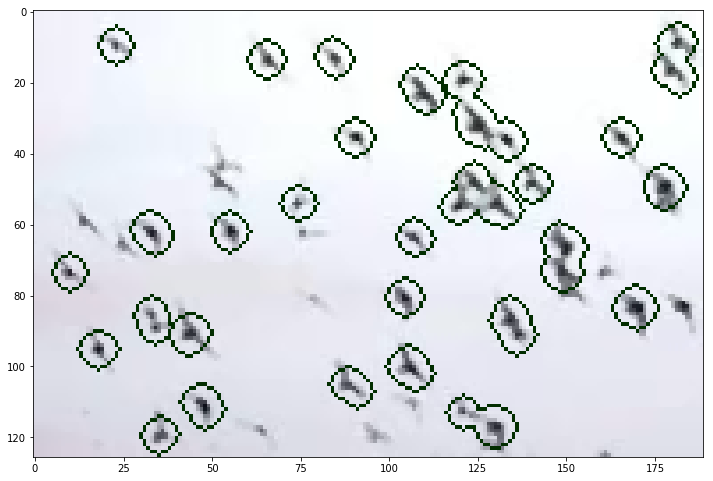

In [83]:
sure_fgf=np.uint8(sure_fg)
contours,hierarchy=cv2.findContours(sure_fgf,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(gryimgcp,contours,i,(2,45,0),1)
disp(gryimgcp)        

In [85]:
s1= 9
s2 = 500
xcnts = []
for cnt in contours:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Bird count: {}".format(len(xcnts)))

Bird count: 28
